In [1419]:
import pandas as pd
import numpy as np
import re

In [1420]:
import matplotlib.pyplot as plt

In [1421]:
import seaborn as sns

# TRAIN RESULTS

Estos son los resultados del entrenamiento (history). Está recogido el máximo valor de cada una de las métricas y de la loss (no sabemos que epoch es)

In [1455]:
path = '/home/mr1142/Documents/Data/models/neumonia/training_data/train_max.csv'
df_train = pd.read_csv(path)

In [1457]:
df_train = df_train.reset_index(drop = True)
index = [i for i in df_train.index if not bool(re.search('completo', df_train['name'][i]))]
df_train = df_train.iloc[index]

In [1458]:
len(df_train)

49

In [1459]:
# df_train[df_train['modelo'] == 'EffNet3'].sort_values(['fine', 'lr', 'mask'])

In [1460]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df_train['name'])

In [1461]:
print(len(modelos))
print(len(modelos_evaluados))

49
49


## Filtrado

In [1462]:
# df_train = df_train[df_train['lr'] == 0.0001]
# df_train = df_train[df_train['fine']<0.8]

In [1463]:
len(df_train[df_train.modelo == 'EffNet3'])

22

In [1464]:
df_train[df_train.modelo == 'EffNet3'].sort_values(['fine', 'lr', 'mask'])

,name,modelo,fine,batch,lr,mask,trainprop,pixels,subset,loss,binary_accuracy,precision,auc,val_loss,val_binary_accuracy,val_precision,val_auc
42,prueba_mask_EffNet3_fine-03_batch-8_lr--05_auc-90,EffNet3,0.3,8,0.00001,1,0.8,512,1.0,3.312881,0.845223,0.791553,0.914971,3.733602,0.838333,0.783784,0.904512
6,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95,EffNet3,0.3,8,0.00010,0,0.8,512,1.0,1.923242,0.956195,0.937028,0.992412,1.695072,0.910000,0.868687,0.956769
15,prueba_mask_EffNet3_fine-03_batch-8_lr-0001_au...,EffNet3,0.3,8,0.00010,1,0.8,512,1.0,2.310367,0.884022,0.836999,0.950367,1.672544,0.790000,0.692708,0.868694
7,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94,EffNet3,0.3,8,0.00100,0,0.8,512,1.0,1.872302,0.949103,0.927939,0.983217,1.155664,0.863333,0.817204,0.943425
21,prueba_mask_EffNet3_fine-03_batch-8_lr-001_auc-91,EffNet3,0.3,8,0.00100,1,0.8,512,1.0,2.081230,0.894451,0.846447,0.959097,1.580021,0.855000,0.826590,0.917094
30,prueba_EffNet3_fine-05_batch-8_lr--05_auc-83,EffNet3,0.5,8,0.00001,0,0.8,512,1.0,3.535861,0.715478,0.601463,0.772699,5.337191,0.751667,0.664234,0.834781
41,prueba_mask_EffNet3_fine-05_batch-8_lr--05_auc-84,EffNet3,0.5,8,0.00001,1,0.8,512,1.0,3.457916,0.734668,0.651769,0.783202,3.194159,0.783333,0.727273,0.845619
0,prueba_EffNet3_fine-05_batch-8_lr-0001_auc-92,EffNet3,0.5,8,0.00010,0,0.8,512,1.0,1.940967,0.877764,0.823529,0.942213,1.523487,0.866667,0.806122,0.922913
14,prueba_mask_EffNet3_fine-05_batch-8_lr-0001_au...,EffNet3,0.5,8,0.00010,1,0.8,512,1.0,2.560124,0.895286,0.855844,0.954906,1.545979,0.841667,0.766497,0.911919
26,prueba_EffNet3_fine-05_batch-8_lr-001_auc-89,EffNet3,0.5,8,0.00100,0,0.8,512,1.0,2.150150,0.791607,0.699088,0.891243,1.115598,0.803333,0.855856,0.894217


In [1432]:
len(df_train[df_train.modelo == 'Xception'])

16

In [1433]:
len(df_train)

49

In [1452]:
df_train.sort_values('val_auc').tail()

,name,modelo,fine,batch,lr,mask,trainprop,pixels,subset,loss,binary_accuracy,precision,auc,val_loss,val_binary_accuracy,val_precision,val_auc
46,completo_EffNet3_fine-07_batch-8_lr-0001_auc-99,EffNet3,0.7,8,0.0001,0,0.8,512,0.0,0.880597,0.988588,0.983011,0.998975,0.598590,0.973253,0.960094,0.993695
47,completo_Xception_fine-05_batch-8_lr-0001_auc-99,Xception,0.5,8,0.0001,0,0.8,512,0.0,0.320999,0.994560,0.991858,0.999585,0.192834,0.976370,0.964770,0.994016
49,completo_Xception_fine-03_batch-8_lr-0001_auc-99,Xception,0.3,8,0.0001,0,0.8,512,0.0,0.321387,0.995898,0.993883,0.999491,0.179783,0.981667,0.972573,0.994397
45,completo_IncResNet_fine-05_batch-8_lr-0001_auc-99,IncResNet,0.5,8,0.0001,0,0.8,512,0.0,0.440691,0.997079,0.995637,0.999640,0.360212,0.978655,0.968054,0.995184
48,completo_IncResNet_fine-03_batch-8_lr-0001_auc-99,IncResNet,0.3,8,0.0001,0,0.8,512,0.0,0.442871,0.994521,0.991819,0.999427,0.199348,0.979485,0.969447,0.996424


## Ploteo

In [1435]:
y = 'val_precision'
data = df_train
lim = np.percentile(data[y], 20)

[(0.7536344647407531, 1.0)]

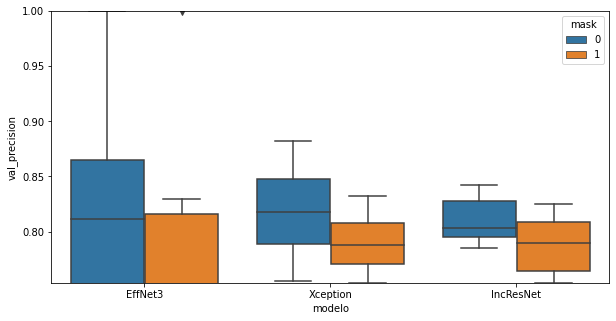

In [1436]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7536344647407531, 1.0)]

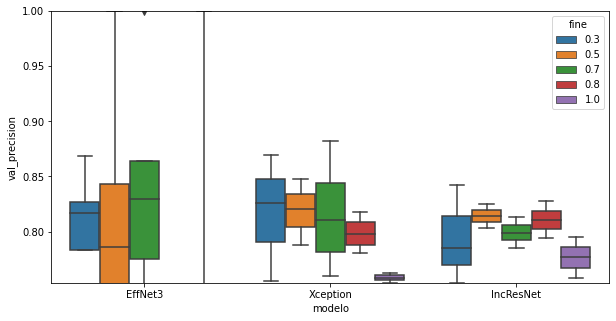

In [1437]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.7536344647407531, 1.0)]

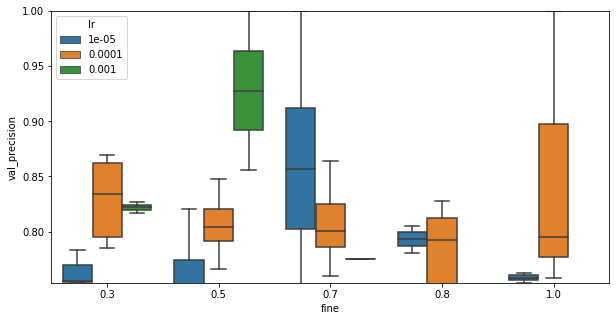

In [1438]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.7536344647407531, 1.0)]

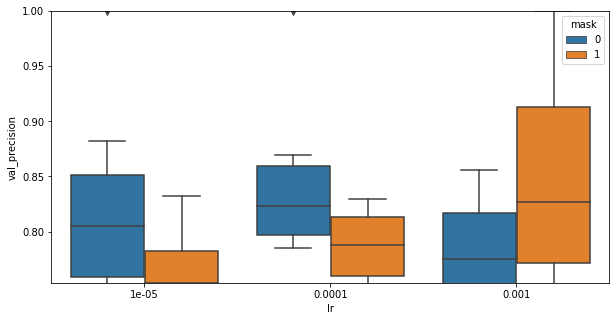

In [1439]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

# SUBSET TEST EVALUATION RESULTS

Estos son los resultados de aplicar model.evaluate() sobre el subset de X_train que he seleccionado para test.

In [1386]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/image_class_evaluation.csv'
df_test = pd.read_csv(path)

### Modelos sin evaluar

In [1387]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df_test['nombre'])

In [1388]:
print(len(modelos))
print(len(modelos_evaluados))

49
49


In [1389]:
modelos_a_evaluar = list(set(modelos_evaluados) - set(modelos))
modelos_a_evaluar

[]

In [1391]:
modelos_train = set(df_train['name'])
list(set(modelos_train)-set(modelos_evaluados))

[]

## Añado labels

In [1393]:
df_test = df_test.reset_index(drop = True)

In [1394]:
df_test['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_test['nombre']))

In [1395]:
df_test['modelo'] = list(map(lambda x: re.split('_', x)[-5], df_test['nombre']))
df_test['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-2])[1], df_test['nombre']))
df_test['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_test['nombre']))
df_test['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_test['nombre']))

In [1396]:
df_test.sort_values('auc').tail()

,nombre,loss,binary_accuracy,precision,auc,mask,modelo,lr,batch,fine
5,prueba_mask_Xception_fine-07_batch-8_lr-0001_a...,0.531752,0.860527,0.799794,0.928654,True,Xception,0001,8,07
35,prueba_Xception_fine-03_batch-8_lr-0001_auc-96,0.549459,0.848849,0.775202,0.928931,False,Xception,0001,8,03
10,prueba_Xception_fine-07_batch-8_lr-0001_auc-93,0.485459,0.848849,0.786164,0.930917,False,Xception,0001,8,07
4,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94,0.488490,0.863196,0.803296,0.931229,False,EffNet3,001,8,03
3,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95,0.436792,0.871204,0.813075,0.945697,False,EffNet3,0001,8,03


## Filtrado

In [1397]:
# df_test = df_test[df_test['lr'] == '0001']
# df_test = df_test[df_test['fine'] != '00']
# df_test = df_test[df_test['fine'] != '08']

## Ploteo

In [1398]:
y = 'auc'
data = df_test
lim = np.percentile(data[y], 20)

[(0.8513707995414734, 1.0)]

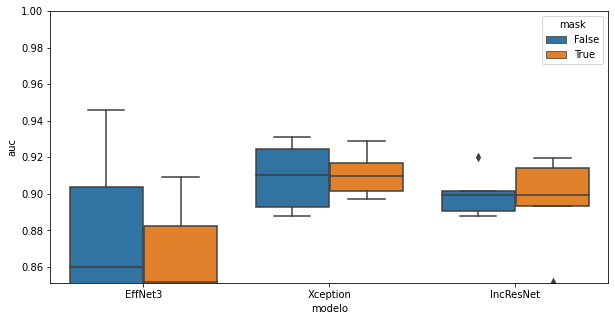

In [1399]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8513707995414734, 1.0)]

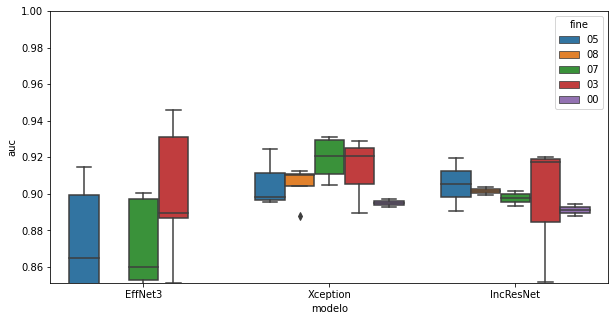

In [1400]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.8513707995414734, 1.0)]

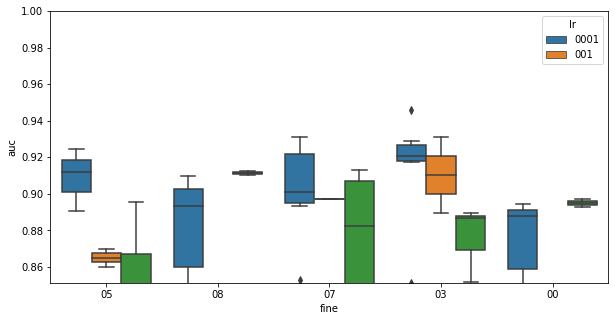

In [1401]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.8513707995414734, 1.0)]

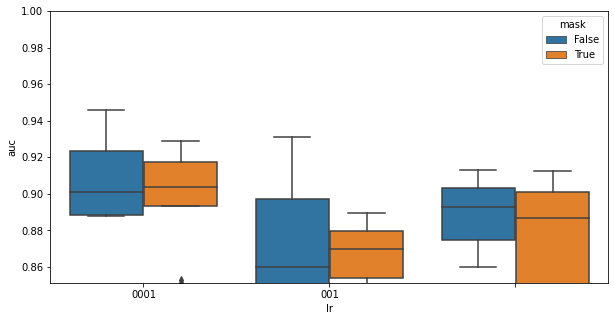

In [1402]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

# SUBSET TEST PREDICTION METRICS

Estos son los resultados de aplicar model.predict() sobre el subset de X_train que he seleccionado para test. Sobre las predicciones se calculan unas métricas personalizadas

In [1413]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/prediction_validation_metrics.csv'
df = pd.read_csv(path)

### Modelos sin evaluar

In [1414]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df['name'])

In [1415]:
print(len(modelos))
print(len(modelos_evaluados))

49
48


In [1416]:
modelos_a_evaluar = list(set(modelos)-set(modelos_evaluados))
modelos_a_evaluar

['prueba_EffNet3_fine-07_batch-8_lr-0001_auc-92']

In [1418]:
modelos_train = set(df_train['name'])
list(set(modelos_train)-set(modelos_evaluados))

['prueba_EffNet3_fine-07_batch-8_lr-0001_auc-92']

## Añado labels

In [1146]:
df['mask'] = list(map(lambda x: bool(re.search('mask', x)), df['name']))

In [1147]:
df['modelo'] = list(map(lambda x: re.split('_', x)[-5], df['name']))
df['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-2])[1], df['name']))
df['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df['name']))
df['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df['name']))

In [1150]:
df['auc_mean'] = (df['auc_0']+df['auc_1']+df['auc_2'])/3

In [1156]:
df.sort_values('auc_mean').tail()

,name,auc_0,younden_0,pr_max_0,pr_cut_0,auc_1,younden_1,pr_max_1,pr_cut_1,auc_2,...,"f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",mask,modelo,lr,batch,fine,auc_mean
7,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94,0.983957,0.340771,0.732340,0.343074,0.874149,0.421650,0.315723,0.542286,0.919113,...,0.844992,0.844727,0.846847,0.846847,False,EffNet3,001,8,03,0.925740
37,prueba_mask_IncResNet_fine-05_batch-8_lr-0001_...,0.974515,0.066946,0.066946,0.110425,0.872377,0.057974,0.049864,0.544718,0.930372,...,0.856353,0.859571,0.854855,0.854855,True,IncResNet,0001,8,05,0.925755
22,prueba_mask_Xception_fine-03_batch-8_lr-0001_a...,0.977626,0.079139,0.098225,0.109531,0.877251,0.567552,0.562125,0.666493,0.942451,...,0.875634,0.876968,0.877878,0.877878,True,Xception,0001,8,03,0.932443
35,prueba_mask_IncResNet_fine-03_batch-8_lr-0001_...,0.975083,0.455335,0.673091,0.626435,0.878748,0.110022,0.026167,0.206303,0.943782,...,0.807455,0.859248,0.801802,0.801802,True,IncResNet,0001,8,03,0.932538
6,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95,0.991293,0.122462,0.366291,0.366291,0.893384,0.219937,0.219937,0.366731,0.931752,...,0.855620,0.865743,0.852853,0.852853,False,EffNet3,0001,8,03,0.938810


In [1149]:
df.columns

Index(['name', 'auc_0', 'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1',
       'younden_1', 'pr_max_1', 'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2',
       'pr_cut_2', 'f1_score_0', 'precision_score_0', 'recall_score_0',
       'accuracy_score_0', 'f1_score_1', 'precision_score_1', 'recall_score_1',
       'accuracy_score_1', 'f1_score_2', 'precision_score_2', 'recall_score_2',
       'accuracy_score_2', 'f1_score[0, 1]', 'precision_score[0, 1]',
       'recall_score[0, 1]', 'accuracy_score[0, 1]', 'f1_score[0, 2]',
       'precision_score[0, 2]', 'recall_score[0, 2]', 'accuracy_score[0, 2]',
       'f1_score[1, 2]', 'precision_score[1, 2]', 'recall_score[1, 2]',
       'accuracy_score[1, 2]', 'mask', 'modelo', 'lr', 'batch', 'fine'],
      dtype='object')

## Ploteo

In [1176]:
y = 'auc_2'
data = df
lim = np.percentile(data[y], 10)

[(0.7706796886977068, 1.0)]

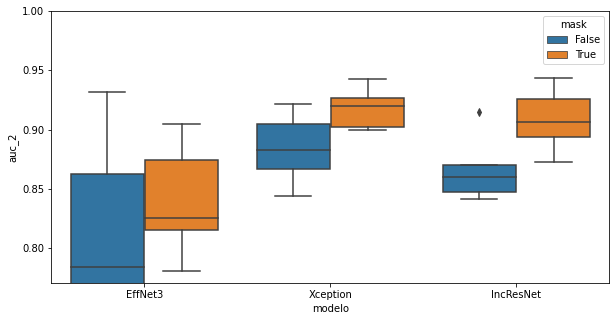

In [1177]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8169012856700544, 1.0)]

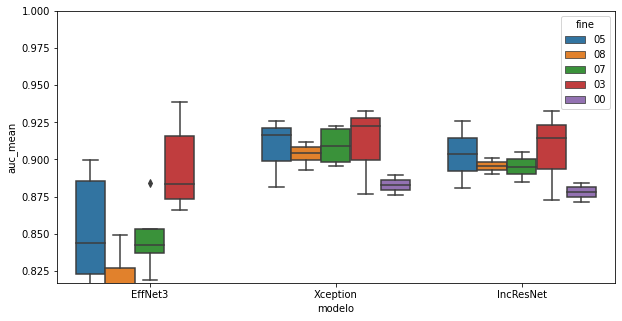

In [1153]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.8169012856700544, 1.0)]

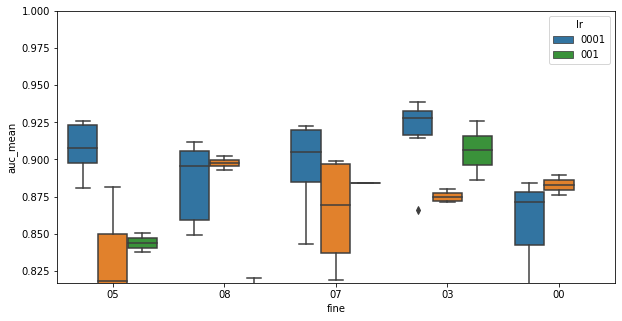

In [1154]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.8169012856700544, 1.0)]

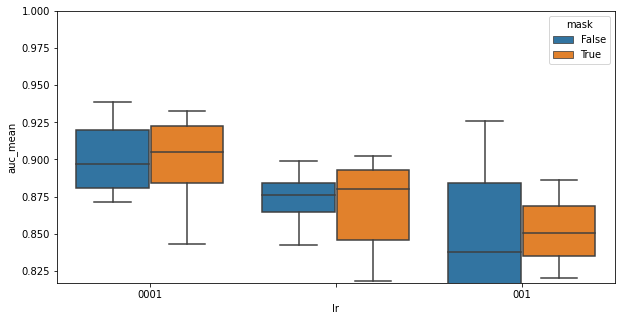

In [1155]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

## Cada modelo

In [786]:
import os
import cv2
import json

In [880]:
model_name = 'prueba_mask_Xception_fine-05_batch-8_lr-0001_auc-91'

In [881]:
p = os.path.join('/home/mr1142/Documents/Data/models/neumonia/validation_results', model_name)

In [882]:
os.listdir(p)

['metricas.json',
 'pred_rec_plot_0.png',
 'auc_plot_0.png',
 'pr_re_th_plot_0.png',
 'pred_rec_plot_1.png',
 'auc_plot_1.png',
 'pr_re_th_plot_1.png',
 'pred_rec_plot_2.png',
 'auc_plot_2.png',
 'pr_re_th_plot_2.png',
 'class_report.csv']

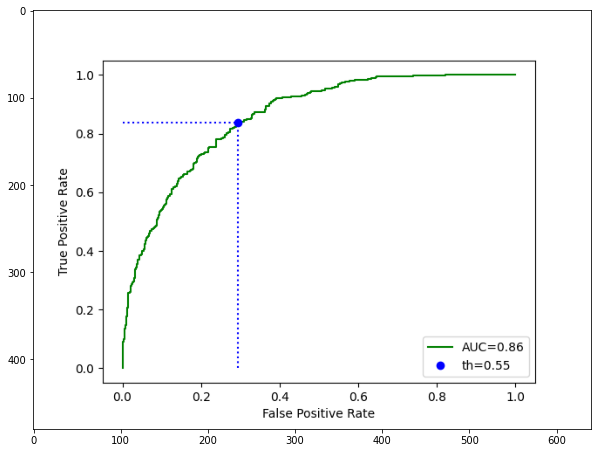

In [886]:
img = cv2.imread(os.path.join(p, 'auc_plot_1.png'))
plt.figure(figsize=(10,10))
plt.imshow(img)

In [859]:
with open(os.path.join(p, model_name + '.json')) as json_file:
    data = json.load(json_file)
data

FileNotFoundError: [Errno 2] No such file or directory: '/home/mr1142/Documents/Data/models/neumonia/validation_results/prueba_IncResNet_fine-00_batch-8_lr-0001_auc-90/prueba_IncResNet_fine-00_batch-8_lr-0001_auc-90.json'

In [304]:
df = pd.read_csv(os.path.join(p, 'class_report.csv'))
df

,Unnamed: 0,precision,recall,f1-score,support
0,normal,0.940299,0.887324,0.913043,71.0
1,moderado,0.630137,0.741935,0.681481,62.0
2,severo,0.750000,0.671642,0.708661,67.0
3,micro avg,0.770000,0.770000,0.770000,200.0
4,macro avg,0.773478,0.766967,0.767729,200.0
5,weighted avg,0.780398,0.770000,0.772791,200.0
6,samples avg,0.770000,0.770000,0.770000,200.0
